# Building a Movie Recommedation Project  based on IMDB dataset

## Importing the Basic Libraries

In [1]:
# lets import the basic Libraries
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for Interactive Shells
from IPython.display import display

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('fivethirtyeight')

## Let's Read the dataset 

In [2]:
data = pd.read_csv('movie_metadata.csv')

In [3]:
## Looking the head section of the dataset 

data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
# let's have a look how many columns and rows are in data

print(data.shape)

(5043, 28)


In [5]:
# lets check the column wise information

data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [6]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [7]:
# lets remove unnecassary columns from the dataset as there is lot of categorical variables in the data

# Use the 'drop()' function to drop the unnecessary columns

data = data.drop(['color', 
                      'director_facebook_likes', 
                      'actor_3_facebook_likes', 
                      'actor_1_facebook_likes', 
                      'cast_total_facebook_likes', 
                      'actor_2_facebook_likes',  
                      'facenumber_in_poster', 
                      'content_rating', 
                      'country', 
                      'movie_imdb_link', 
                      'aspect_ratio',
                      'plot_keywords',
                      ], 
                       axis = 1)
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

## Missing Values Imputation

In [8]:
# lets check the rows having high percentage of missing values in the dataset

round(100*(data.isnull().sum()/len(data.index)), 2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

In [9]:
# We can see that Gross and Budget columns has lot of missing values so better remove those columns
# 'isnan' function of NumPy alongwith a negation '~'

data = data[~np.isnan(data['gross'])]
data = data[~np.isnan(data['budget'])]

# we have to remove all the rows where the leading actor's name is missing.
#data = data[~np.isnan(data['actor_1_name'])]

# Now lets again check the Missing Values column wise
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [10]:
# lets impute the missing values

# Use the mean function for to fill the numerical missing columns
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace = True)
data['duration'].fillna(data['duration'].mean(), inplace = True)

# Use the mode function for categorical column
data['language'].fillna(data['language'].mode()[0], inplace = True)

# As we know we cannot fill the actor_name with a statistical values so better fill the missing values
# with a "Unknown Actor" character inplace of Actor_names.

data['actor_1_name'].fillna('Unknown Actor', inplace = True)
data['actor_2_name'].fillna('Unknown Actor', inplace = True)
data['actor_3_name'].fillna('Unknown Actor', inplace = True)

# As we imputed all the missing values lets check the no. of total missing values in the dataset
data.isnull().sum().sum()

0

## Let's Do some Feature Engineering to improve the performance of the model

In [11]:
# Lets convert the Gross and Budget from $ to Million $ to make our analysis easier

data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000

In [12]:
# Lets Create a Profit column using the Budget and Gross

data['Profit'] = data['gross'] - data['budget']

# Lets have a look on the Top10 profitable movies of all time 

data[['Profit','movie_title']].sort_values(by = 'Profit', ascending  = False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


In [13]:
# By looking at the above result we can easily analyze that there are some duplicate

# Lets have a look number of rows before removing the duplicates

print("No. of Rows Before Removing Duplicates: ",data.shape[0])

# so lets remove all the duplicates from the data

data.drop_duplicates(subset = None, keep = 'first', inplace = True)

# Let's print the no. of rows after removing Duplicates

print("No. of Rows After Removing Duplicates: ",data.shape[0])

No. of Rows Before Removing Duplicates:  3891
No. of Rows After Removing Duplicates:  3856


In [14]:
# Lets check the Top 10 Profitable Movies Again and now we can see proper data without duplicates

data[['movie_title','Profit']].sort_values(by = 'Profit', ascending  = False).head(10)

,movie_title,Profit
0,Avatar,523.505847
29,Jurassic World,502.177271
26,Titanic,458.672302
3024,Star Wars: Episode IV - A New Hope,449.935665
3080,E.T. the Extra-Terrestrial,424.449459
17,The Avengers,403.279547
509,The Lion King,377.783777
240,Star Wars: Episode I - The Phantom Menace,359.544677
66,The Dark Knight,348.316061
439,The Hunger Games,329.999255


In [15]:
# let's have a look how many languages are in Language Column 

data['language'].value_counts().index

Index(['English', 'French', 'Spanish', 'Mandarin', 'German', 'Japanese',
       'Hindi', 'Cantonese', 'Italian', 'Portuguese', 'Korean', 'Norwegian',
       'Thai', 'Danish', 'Persian', 'Dutch', 'Hebrew', 'Indonesian',
       'Aboriginal', 'Dari', 'Swedish', 'Maya', 'Bosnian', 'Telugu',
       'Hungarian', 'Arabic', 'Icelandic', 'Russian', 'Zulu', 'Aramaic',
       'Romanian', 'Dzongkha', 'None', 'Vietnamese', 'Filipino', 'Mongolian',
       'Czech', 'Kazakh'],
      dtype='object')

In [16]:
# Looking at the above output we can easily observe that out of 3,500 movies only 150 movies are of other languages

# so it is better to keep only two languages that is English and Foreign
def language(x):
    if x == 'English':
        return 'English'
    else:
        return 'Foreign'

# lets apply the function on the language column
data['language'] = data['language'].apply(language)

# lets check the Top Foreign Movies based on IMDB Score
data[data['language'] == 'Foreign'][['language',
                                     'movie_title',
                                     'imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(10)

,language,movie_title,imdb_score
4498,Foreign,"The Good, the Bad and the Ugly",8.9
4029,Foreign,City of God,8.7
4747,Foreign,Seven Samurai,8.7
2373,Foreign,Spirited Away,8.6
4921,Foreign,Children of Heaven,8.5
4259,Foreign,The Lives of Others,8.5
3931,Foreign,Samsara,8.5
4659,Foreign,A Separation,8.4
1329,Foreign,Baahubali: The Beginning,8.4
2970,Foreign,Das Boot,8.4


In [17]:
## Let'the Top 10 imdb rated English movies all time

data[data['language'] == 'English'][['language','movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(10)

,language,movie_title,imdb_score
1937,English,The Shawshank Redemption,9.3
3466,English,The Godfather,9.2
66,English,The Dark Knight,9.0
2837,English,The Godfather: Part II,9.0
339,English,The Lord of the Rings: The Return of the King,8.9
1874,English,Schindler's List,8.9
3355,English,Pulp Fiction,8.9
97,English,Inception,8.8
2051,English,Star Wars: Episode V - The Empire Strikes Back,8.8
836,English,Forrest Gump,8.8


In [18]:
# The Duration of Movies is not varying a lot but we know that most of the users either like 
# watching long movies or short duration movies. we can categorize the movies in two part 
# i.e., short and long.

# lets define a function for categorizing Duration of Movies
def duration(x):
    if x <= 120:
        return 'Short'
    else:
        return 'Long'
    
# lets apply this function on the duration column
data['duration'] = data['duration'].apply(duration)

# lets check the values of Duration column
data['duration'].value_counts()

Short    2939
Long      917
Name: duration, dtype: int64

In [19]:
# lets also check the values in the Genres Column

data['genres'].value_counts()[:10]

Drama                          153
Comedy|Drama|Romance           151
Comedy|Drama                   147
Comedy                         145
Comedy|Romance                 135
Drama|Romance                  119
Crime|Drama|Thriller            82
Action|Crime|Thriller           55
Action|Crime|Drama|Thriller     50
Action|Adventure|Sci-Fi         46
Name: genres, dtype: int64

In [20]:
# We can see a lot of Genre in the movies list and also,so it will be hard to analyze
# let break the Genre into four genres

data['Moviegenres'] = data['genres'].str.split('|')
data['Genre1'] = data['Moviegenres'].apply(lambda x: x[0])

# Some of the movies have only one genre. In such cases, assign the same genre to 'genre_2' as well
data['Genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['Genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['Genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])

# lets check the head of the  data
data[['genres','Genre1','Genre2','Genre3','Genre4']].head(5)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


## Let's Do some Data visualization to understand the insights in the Data

   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice               1599.794424
1    150                        Ghostbusters               1076.336425
2   1582                        Ghostbusters               1075.827482
3     96                        Interstellar               1024.560802
4   3015               10 Days in a Madhouse                828.025478
5    945                      Into the Woods                692.937200
6     73                       Suicide Squad                652.816996
7   1190                Fifty Shades of Grey                624.306881
8    108                            Warcraft                622.790277
9     92        Independence Day: Resurgence                599.274128


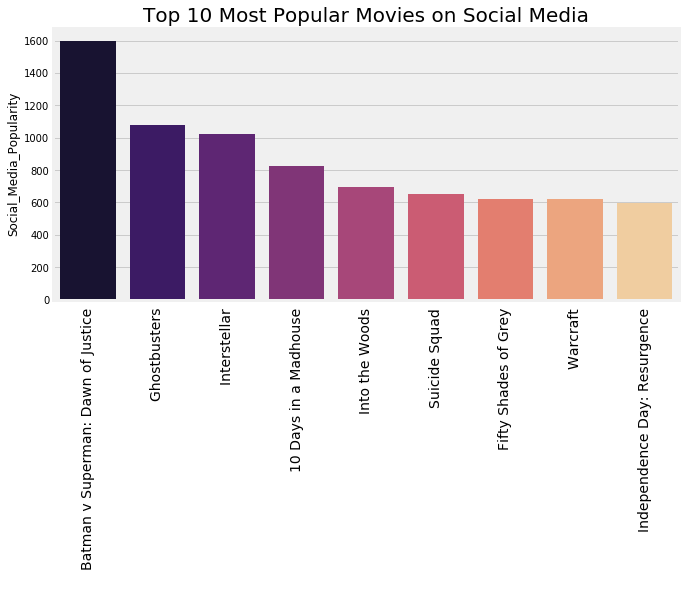

In [21]:
# lets also calculate the Social Media Popularity of a Movie 
# To calculate popularity of a movie, we can aggregate No. of voted users, No. of Users for Reviews, and Facebook Likes.

data['Social_Media_Popularity'] = (data['num_user_for_reviews']/
                                   data['num_voted_users'])*data['movie_facebook_likes']

# lets also check the Top 10 Most Popular Movies on Social Media

x = data[['movie_title','Social_Media_Popularity']].sort_values(by = 'Social_Media_Popularity',
                                                                ascending = False).head(10).reset_index()
print(x)
plt.figure(figsize=(10,5))
sns.barplot(x['movie_title'], x['Social_Media_Popularity'], palette = 'magma')
plt.title('Top 10 Most Popular Movies on Social Media', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.xlabel(' ')
plt.show()

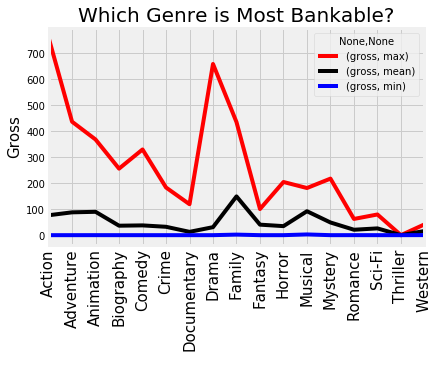

The Most Profitable Movie from each Genre


,Genre1,movie_title,gross
0,Action,Avatar,760.506
509,Adventure,The Lion King,422.784
521,Animation,Despicable Me 2,368.05
1403,Biography,The Blind Side,255.95
836,Comedy,Forrest Gump,329.691
3466,Crime,The Godfather,134.822
3583,Documentary,Fahrenheit 9/11,119.078
26,Drama,Titanic,658.672
3080,Family,E.T. the Extra-Terrestrial,434.949
2485,Fantasy,The Others,96.4718


In [44]:
# Lets compare the Gross with Genres of films 

# First of all group the genres and get max, min, and avg gross of the movies of that Genre.)

display(data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))

# lets plot these values using lineplot

data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).plot(kind = 'line', color = ['red','black','blue'])
plt.title('Which Genre is Most Bankable?', fontsize = 20)
plt.xticks(np.arange(17), ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation = 90, fontsize = 15)
plt.ylabel('Gross', fontsize = 15)
plt.xlabel(' ',)
plt.show()

print('The Most Profitable Movie from each Genre')
display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1',
                                    'movie_title','gross']].style.background_gradient(cmap = 'copper'))

Most Profitable Years in Box Office


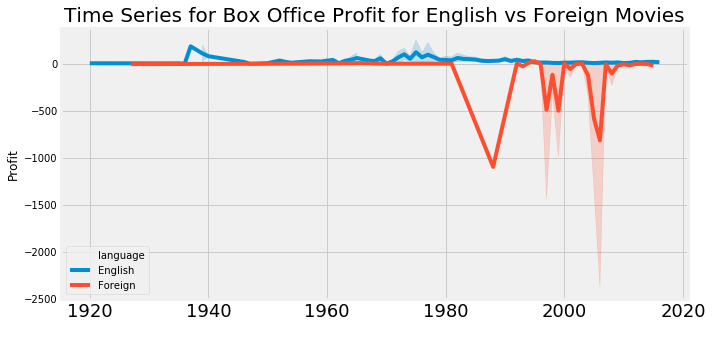

Movies that Made Huge Losses


,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.7
2334,Steamboy,Foreign,-2127.11
2988,The Host,Foreign,-12213.3
3005,Fateless,Foreign,-2499.8
3859,Lady Vengeance,Foreign,-4199.79


In [46]:
# lets convert year into integer
data['title_year'] = data['title_year'].astype('int')

print('Most Profitable Years in Box Office')
display(data[['title_year','language','Profit']].groupby(['language',
                                    'title_year']).agg('sum').sort_values(by = 'Profit',
                                     ascending = False).head(10).style.background_gradient(cmap = 'Greens'))

# lets plot them
plt.figure(figsize=(10,5))
sns.lineplot(data['title_year'], data['Profit'], hue = data['language'])
plt.title('Time Series for Box Office Profit for English vs Foreign Movies', fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel(' ')
plt.show()

print("Movies that Made Huge Losses")
display(data[data['Profit'] < -2000][['movie_title',
                        'language','Profit']].style.background_gradient(cmap = 'Reds'))

,movie_title,duration,gross,Profit
0,Avatar,Long,760.506,523.506
29,Jurassic World,Long,652.177,502.177
26,Titanic,Long,658.672,458.672
3024,Star Wars: Episode IV - A New Hope,Long,460.936,449.936
17,The Avengers,Long,623.28,403.28


,movie_title,duration,gross,Profit
3080,E.T. the Extra-Terrestrial,Short,434.949,424.449
509,The Lion King,Short,422.784,377.784
812,Deadpool,Short,363.024,305.024
521,Despicable Me 2,Short,368.05,292.05
338,Finding Nemo,Short,380.839,286.839


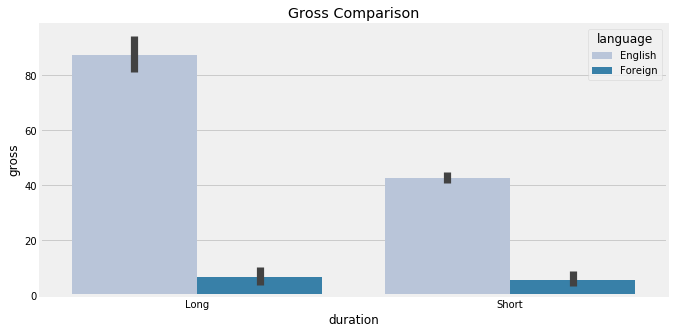

In [48]:
## lets check the Gross and proft of long duration movies

display(data[data['duration'] == 'Long'][['movie_title', 'duration', 'gross',
                    'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'copper'))

## Checking the Gross and profit of short duration movies

display(data[data['duration'] == 'Short'][['movie_title', 'duration', 'gross',
                    'Profit']].sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'copper'))
plt.figure(figsize=(10,5))
sns.barplot(data['duration'], data['gross'], hue = data['language'], palette = 'PuBu')
plt.title('Gross Comparison')
plt.show()

Average IMDB Score for Long Duration Movies is 7.06
Average IMDB Score for Short Duration Movies is 6.28

Highest Rated Long Duration Movie
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3

Highest Rated Short Duration Movie
               movie_title  imdb_score
3592  The Usual Suspects          8.6


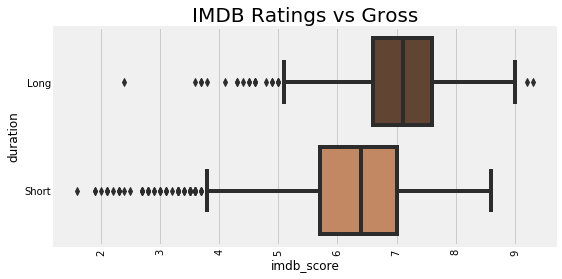

In [50]:
## Let's check the Average IMDB score for Long Duration and Short Durtion movies

print("Average IMDB Score for Long Duration Movies is {0:.2f}".format(data[data['duration'] == 'Long']['imdb_score'].mean()))
print("Average IMDB Score for Short Duration Movies is {0:.2f}".format(data[data['duration'] == 'Short']['imdb_score'].mean()))

## Checking the Highest Rated Long Duration and short duration movie

print("\nHighest Rated Long Duration Movie\n", 
    data[data['duration'] == 'Long'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))
print("\nHighest Rated Short Duration Movie\n", 
    data[data['duration'] == 'Short'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))

plt.figure(figsize=(8,4))
sns.boxplot(data['imdb_score'], data['duration'], palette = 'copper')
plt.title('IMDB Ratings vs Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [51]:
## Checking the gross and profits of Actor with there Names

def query_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a.append(b)
    y = x.append(c)
    
    y = y[['movie_title',
       'budget',
       'gross',
       'title_year',
       'imdb_score',
        ]].reset_index(drop = True).sort_values(by = 'imdb_score', ascending = False)
    return y

In [52]:
query_actors('Meryl Streep')

,movie_title,budget,gross,title_year,imdb_score
15,Fantastic Mr. Fox,40.0,20.999103,2009,7.8
20,Adaptation.,19.0,22.245861,2002,7.7
8,The Hours,25.0,41.597830,2002,7.6
19,Doubt,20.0,33.422556,2008,7.5
18,The Bridges of Madison County,35.0,70.960517,1995,7.5
17,August: Osage County,25.0,37.738400,2013,7.3
5,Out of Africa,31.0,87.100000,1985,7.2
2,Julie & Julia,40.0,94.125426,2009,7.0
7,One True Thing,30.0,23.209440,1998,7.0
3,The Devil Wears Prada,35.0,124.732962,2006,6.8


In [53]:
data['actor_1_name'].value_counts().index

Index(['Robert De Niro', 'Johnny Depp', 'J.K. Simmons', 'Nicolas Cage',
       'Denzel Washington', 'Matt Damon', 'Bruce Willis', 'Liam Neeson',
       'Robin Williams', 'Robert Downey Jr.',
       ...
       'Harvey Fierstein', 'Wei Zhao', 'Yuki Matsuzaki', 'Kenneth Tobey',
       'James Duval', 'Judith Chapman', 'Christian Monzon',
       'Daniel von Bargen', 'Tommy Sheppard', 'Laila Haley'],
      dtype='object', length=1510)

In [54]:
# By applying the Below code we can check hit ratio and max profit of the actor throughout his career
import warnings
warnings.filterwarnings('ignore')

def actors_report(Actor):
    a = data[data['actor_1_name'] == Actor]
    b = data[data['actor_2_name'] == Actor]
    c = data[data['actor_3_name'] == Actor]
    x = a.append(b)
    y = x.append(c)
    hit_movies = y[(data['imdb_score'] > 5) & (data['Profit'] > 0)].shape[0]
    total_movies = y.shape[0]
    hit_ratio = hit_movies/total_movies
    print("Hit Ratio : {0:.0f}%".format(hit_ratio*100))
    print("Time:",y['title_year'].min(), y['title_year'].max())
    print("Max Gross : {0:.2f} Millions".format(y['gross'].max()))
    print("Avg Gross : {0:.2f} Millions".format(y['gross'].mean()))
    print("Min Gross : {0:.2f} Millions".format(y['gross'].min()))
    print("Number of 100 Million Movies :", y[y['gross'] > 100].shape[0])
    print("Avg IMDB Score : {0:.2f}".format(y['imdb_score'].mean()))
    print("Most Common Genres:\n",y['Genre1'].value_counts().head())
    
actors_report('Tom Cruise')

Hit Ratio : 75%
Time: 1983 2015
Max Gross : 234.28 Millions
Avg Gross : 118.94 Millions
Min Gross : 15.00 Millions
Number of 100 Million Movies : 17
Avg IMDB Score : 7.09
Most Common Genres:
 Action     14
Drama       8
Crime       2
Fantasy     1
Comedy      1
Name: Genre1, dtype: int64


## Predicting the Recommended Movies based on Actor we select

In [55]:
## Predicting the 
def recommend_movies_on_actors(x):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == x]
    b = data[['movie_title','imdb_score']][data['actor_2_name'] == x]
    c = data[['movie_title','imdb_score']][data['actor_3_name'] == x]
    a = a.append(b)
    a = a.append(c)
    a = a.sort_values(by = 'imdb_score', ascending = False)
    return a.head(15)

In [56]:
recommend_movies_on_actors('Tom Cruise')

,movie_title,imdb_score
1868,Rain Man,8.0
75,Edge of Tomorrow,7.9
284,Minority Report,7.7
158,The Last Samurai,7.7
736,Collateral,7.6
1524,A Few Good Men,7.6
940,Interview with the Vampire: The Vampire Chroni...,7.6
155,Mission: Impossible - Ghost Protocol,7.4
135,Mission: Impossible - Rogue Nation,7.4
671,Eyes Wide Shut,7.3


## Recommending similar Genres

In [58]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [59]:
from mlxtend.preprocessing import TransactionEncoder

x = data['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns = te.columns_)

# lets check the head of x
x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [64]:
# lets convert this data into boolean so that we can perform calculations
genres = x.astype('int')
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [65]:
# now, lets insert the movie titles in the first column, so that we can better understand the data
genres.insert(0, 'movie_title', data['movie_title'])
genres.head()

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NaN,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [66]:
# lets set these movie titles as index of the data
genres = genres.set_index('movie_title')
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
NaN,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [67]:
# making a recommendation engine for getting similar genres

def recommendation_genres(gen):
    gen = genres[gen]
    similar_genres = genres.corrwith(gen)
    similar_genres = similar_genres.sort_values(ascending=False)
    similar_genres = similar_genres.iloc[1:]
    return similar_genres.head(3)

In [68]:
recommendation_genres('Action')

Adventure    0.320686
Thriller     0.303907
Sci-Fi       0.295135
dtype: float64

## Recommending similar Movies

In [71]:
# lets make a sparse matrix to recommend the movies

x = genres.transpose()
x.head(5)

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,...,25th Hour,NaN,Bound,Requiem for a Dream,NaN,Tango,NaN,Moms' Night Out,Donnie Darko,NaN
Action,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [72]:
x = pd.DataFrame(x)
x = x.astype('int')

In [73]:
# making a recommendation engine for getting similar movies

def recommendation_movie(movie):    
    movie = x[movie+'\xa0']
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

In [74]:
# lets test on some results
recommendation_movie('Spectre')

movie_title
The Mirror Has Two Faces      1.0
New York Minute               1.0
Where the Heart Is            1.0
NaN                           1.0
From Hell                     1.0
Ghostbusters                  1.0
Hulk                          1.0
Flirting with Disaster        1.0
Jurassic World                1.0
A Walk to Remember            1.0
Hedwig and the Angry Inch     1.0
Casino Royale                 1.0
The Fighter                   1.0
Flushed Away                  1.0
The Cat in the Hat            1.0
The Aviator                   1.0
NaN                           1.0
Hostage                       1.0
9                             1.0
Horrible Bosses 2             1.0
dtype: float64